# Churn Prediction with scikit-learn and TensorFlow


Did you know that it costs five times as much to attract a new customer, than to keep an existing one? 

Customer retention is forever one of the key corporate strategies to maintain a continuous revenue for any organization, especially those facing fierce competition in a free market. 

Customer churn prediction helps to identify potential lost customers on time to allow a company take actions to avoid loosing customers. 

The prediction process is heavily data-driven and often utilizes advanced machine learning techniques.

In this demo, we'll explore what types of customer data are typically used, perform data analysis, and train churn prediction models using scikit-learn and deep learning technology.

## Data

For this tutorial, we use the public available Orange Telecoms Churn Dataset. This dataset consists of cleaned customer activity data (features), and a churn label specifying whether the customer canceled their subscription or not. The dataset has the following schema:

1. State: string
2. Account length: integer
3. Area code: integer
4. International plan: string
5. Voice mail plan: string
6. Number vmail messages: integer
7. Total day minutes: double
8. Total day calls: integer
9. Total day charge: double
10. Total eve minutes: double
11. Total eve calls: integer
12. Total eve charge: double
13. Total night minutes: double
14. Total night calls: integer
15. Total night charge: double
16. Total intl minutes: double
17. Total intl calls: integer
18. Total intl charge: double
19. Customer service calls: integer
20. Churn: string

## Setup imports and variables

In [158]:
#Run once to install the required packages
!pip install -U scikit-learn
!pip install wget

Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sa18-1aec069023a1fb-9f2ef3fdc1ce/.local/lib/python2.7/site-packages


In [159]:
# import required pachages
import pandas as pd
import pylab as plt
import numpy as np
import tensorflow as tf

# show matplotlib figures in the notebook
%matplotlib inline

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))


## 1. Data acquisition


### Load data from a CSV file

For this tutorial, we download the data from a CSV file on Github and then ue pandas.read_csv() to read the data into a Pandas DataFrame. In IBM Data Science Experience on IBM Cloud, you also can simply drag and drop the CSV file to add it as a dataset, and then select “Insert Code” to automatically generate the code to read the CSV file from cloud object storage. For larger datasets, you may prefer to use a SparkSession DataFrame instead, but in that case, using a Pandas DataFrame is suffice.

In [160]:
import wget
data_url ='https://github.com/mlhubca/lab/raw/master/churn/churn-all.csv'

#remove existing files before downloading
!rm -f churn-all.csv

data_file = wget.download(data_url)

df_data_1 = pd.read_csv(data_file)
df_data_1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 2. Data exploration & visualization

Let's check the basic summary of the DataFrame:

In [161]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


Type 'object' is a string for pandas, which poses problems with machine learning algorithms. If we want to use these as features, we'll need to convert these to number representations.

Then we check the descriptive statistics of the DataFrame.

Spark and Pandas DataFrames include some built-in functions for statistical processing. The _describe()_ function performs summary statistics calculations on all numeric columns, and returns them as a DataFrame. 

In [162]:
df_data_1.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Check if there are any missing values:

In [163]:
df_data_1.isnull().values.any()

False

Let's check the ratio of Churn.

In [164]:
df_data_1['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Grouping the data by the Churn field and counting the number of instances in each group shows that there are roughly 6 times as many false churn samples as true churn samples.


Visualize th ratio of churn:

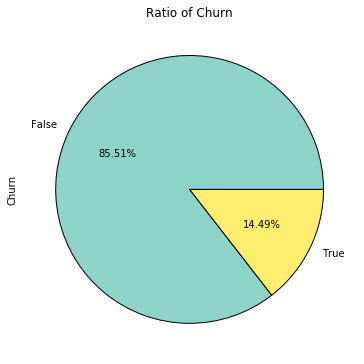

In [165]:
df_data_1['Churn'].value_counts().plot(kind='pie', figsize=(6,6), colormap='Set3', autopct='%.2f%%', title='Ratio of Churn')

Now that we have a general idea of the data set contents, we can dive deeper into each column. We'll be doing exploratory data analysis and cleaning data to setup 'features' we'll be using in our machine learning algorithms.

### Correlations and data preparation

We use the Pandas library to examine correlations between the numeric columns by generating scatter plots of them.

For the Pandas workload, we don't want to pull the entire data set into the Spark driver, as that might exhaust the available RAM and throw an out-of-memory exception. Instead, we'll randomly sample a portion of the data (say 10%) to get a rough idea of how it looks. 

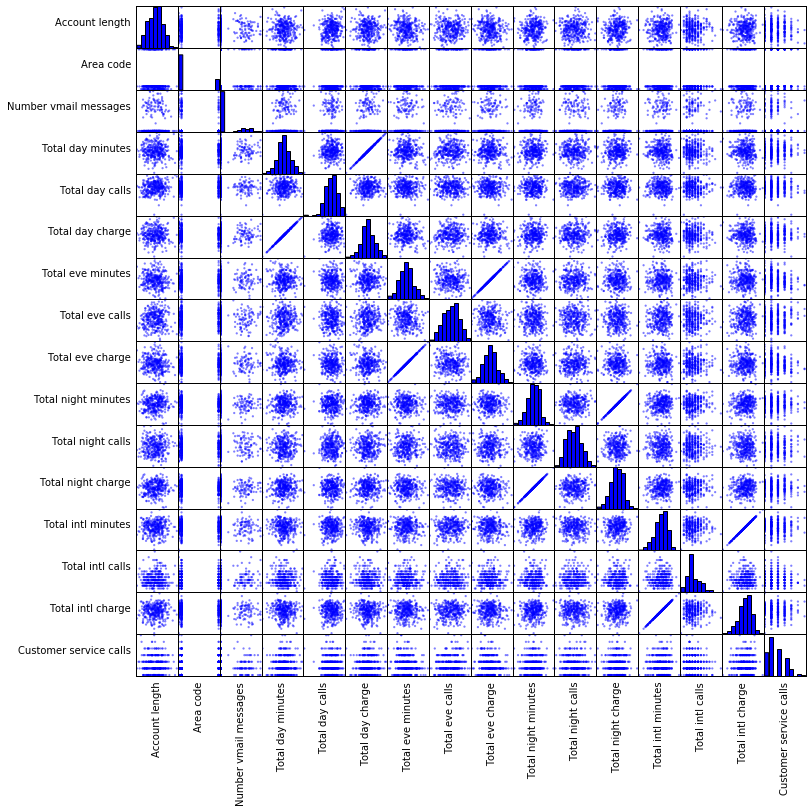

In [166]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

sampled_data = df_data_1.select_dtypes(include=numerics).sample(frac=0.1)

axs = pd.plotting.scatter_matrix(sampled_data, figsize=(12, 12));

# Rotate axis labels and remove axis ticks
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

It's obvious that there are several highly correlated fields, ie _Total day minutes_ and _Total day charge_. Such correlated data won't be very beneficial for our model training runs, so we're going to remove them. 

Plot a few features to get a better idea of each:

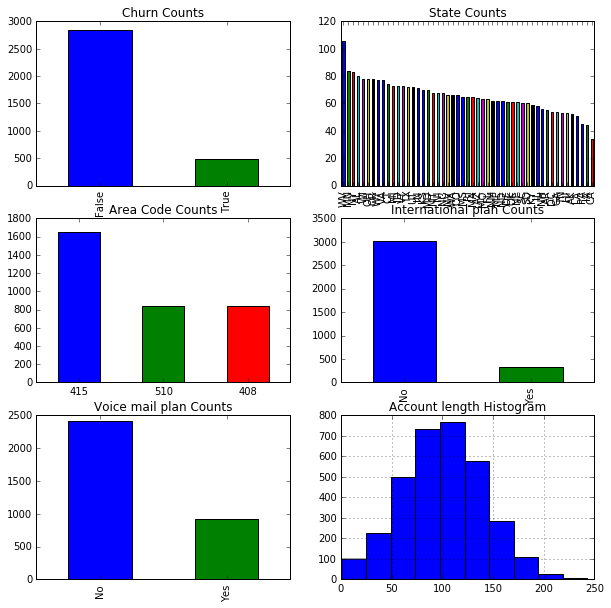

In [167]:
# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot churn counts
plt.subplot2grid(fig_dims, (0, 0))
df_data_1['Churn'].value_counts().plot(kind='bar', title='Churn Counts')

# Plot state counts
plt.subplot2grid(fig_dims, (0, 1))
df_data_1['State'].value_counts().plot(kind='bar', title='State Counts')

# Plot area code counts
plt.subplot2grid(fig_dims, (1, 0))
df_data_1['Area code'].value_counts().plot(kind='bar', title='Area Code Counts')
plt.xticks(rotation=0)

plt.subplot2grid(fig_dims, (1, 1))
df_data_1['International plan'].value_counts().plot(kind='bar', title='International plan Counts')

plt.subplot2grid(fig_dims, (2, 0))
df_data_1['Voice mail plan'].value_counts().plot(kind='bar', title='Voice mail plan Counts')

# Plot the Age histogram
plt.subplot2grid(fig_dims, (2, 1))
df_data_1['Account length'].hist()
plt.title('Account length Histogram')

plt.show()

In [168]:
df_data_1.groupby('Churn').count()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,,,,
False,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850,2850
True,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483,483


In [169]:
iplan_xt = pd.crosstab(df_data_1['International plan'], df_data_1['Churn'])
iplan_xt

Churn,False,True
International plan,,
No,2664,346
Yes,186,137


## 3.  Data preparation


we're going to remove several highly correlated fields, ie Total day minutes and Total day charge. Such correlated data won't be very beneficial for our model training runs.

In [170]:
df_data_1 = df_data_1.drop(['Total day charge',\
                            'Total eve charge',\
                            'Total night charge',\
                            'Total intl charge'], axis=1)
    
df_data_1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False


The original dataset contains both numerical variables and categorical variables. To make the columns more meaningful, we will transfrom string columns to numeric represenations

In [171]:
df_data_1.dtypes[df_data_1.dtypes.map(lambda x: x == 'object')]

State                 object
International plan    object
Voice mail plan       object
dtype: object

These variables might have also played a role in determining a customer's churn rate. We'll need to map those variables from a string to a number to prepare it for machine learning algorithms.

Generate a mapping of the variable from a string to a number representation:

In [172]:
international_plan_values = sorted(df_data_1['International plan'].unique())
international_plan_mapping = dict(zip(international_plan_values, range(0, len(international_plan_values) + 1)))
international_plan_mapping

{'No': 0, 'Yes': 1}

Transform the variable from a string to a number representation:

In [173]:
df_data_1['international_plan'] = df_data_1['International plan'].map(international_plan_mapping).astype(int)
df_data_1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn,international_plan
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,0
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,0
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,0
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,1
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,1


Perform the same process to transform other string variables to a number representation:

In [174]:
voice_mail_plan_values = sorted(df_data_1['Voice mail plan'].unique())
voice_mail_plan_mapping = dict(zip(voice_mail_plan_values, range(0, len(voice_mail_plan_values) + 1)))

df_data_1['voice_mail_plan'] = df_data_1['Voice mail plan'].map(voice_mail_plan_mapping).astype(int)
df_data_1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn,international_plan,voice_mail_plan
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,0,1
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,0,1
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,0,0
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,1,0
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,1,0


In [175]:
state_values = sorted(df_data_1['State'].unique())
state_mapping = dict(zip(state_values, range(0, len(state_values) + 1)))

df_data_1['state'] = df_data_1['State'].map(state_mapping).astype(int)
df_data_1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn,international_plan,voice_mail_plan,state
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,0,1,16
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,0,1,35
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,0,0,31
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,1,0,35
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,1,0,36


Transfrom the target variable from a string to a number representation as well:

In [176]:
churn_values = sorted(df_data_1['Churn'].unique())
churn_mapping = dict(zip(churn_values, range(0, len(churn_values) + 1)))
churn_mapping

{False: 0, True: 1}

In [177]:
df_data_1['churn'] = df_data_1['Churn'].map(churn_mapping).astype(int)
df_data_1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,Churn,international_plan,voice_mail_plan,state,churn
0,KS,128,415,No,Yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,0,1,16,0
1,OH,107,415,No,Yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,0,1,35,0
2,NJ,137,415,No,No,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,0,0,31,0
3,OH,84,408,Yes,No,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,1,0,35,0
4,OK,75,415,Yes,No,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,1,0,36,0


Drop the following columns:
- The "International plan" since we will use "international_plan"
- The "Voice mail plan" since we will use "voice_mail_plan"
- The "State" since we will use "state"
- The "Churn" sincd we will use "churn"

In [178]:
df_data_1 = df_data_1.drop(['International plan',\
                            'Voice mail plan',\
                            'State',\
                            'Churn'], axis=1)
    
df_data_1.head()   

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls,international_plan,voice_mail_plan,state,churn
0,128,415,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,16,0
1,107,415,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1,35,0
2,137,415,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,31,0
3,84,408,0,299.4,71,61.9,88,196.9,89,6.6,7,2,1,0,35,0
4,75,415,0,166.7,113,148.3,122,186.9,121,10.1,3,3,1,0,36,0


In [179]:
# rename columns
df_data_1.rename(columns={'Account length':'account_length',\
                        'Area code':'area_code',\
                        'Number vmail messages':'number_vmail_messages',\
                        'Total day minutes':'total_day_minutes',\
                        'Total day calls':'total_day_calls',\
                        'Total eve minutes':'total_eve_minutes',\
                        'Total eve calls':'total_eve_calls',\
                        'Total night minutes':'total_night_minutes',\
                        'Total night calls':'total_night_calls',\
                        'Total intl minutes':'total_intl_minutes',\
                        'Total intl calls':'total_intl_calls',\
                        'Customer service calls':'customer_service_calls'\
                       }, inplace=True)


Let's take a last look of the data:

In [180]:
df_data_1.head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,international_plan,voice_mail_plan,state,churn
0,128,415,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,1,16,0
1,107,415,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,1,35,0
2,137,415,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,0,31,0
3,84,408,0,299.4,71,61.9,88,196.9,89,6.6,7,2,1,0,35,0
4,75,415,0,166.7,113,148.3,122,186.9,121,10.1,3,3,1,0,36,0


In [181]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
account_length            3333 non-null int64
area_code                 3333 non-null int64
number_vmail_messages     3333 non-null int64
total_day_minutes         3333 non-null float64
total_day_calls           3333 non-null int64
total_eve_minutes         3333 non-null float64
total_eve_calls           3333 non-null int64
total_night_minutes       3333 non-null float64
total_night_calls         3333 non-null int64
total_intl_minutes        3333 non-null float64
total_intl_calls          3333 non-null int64
customer_service_calls    3333 non-null int64
international_plan        3333 non-null int64
voice_mail_plan           3333 non-null int64
state                     3333 non-null int64
churn                     3333 non-null int64
dtypes: float64(4), int64(12)
memory usage: 416.7 KB


## 4. Model training

### Splitting the data into Training and Test Data

The fundamental goal of ML is to generalize beyond the data instances used to train models. We want to evaluate the model to estimate the quality of its pattern generalization for data the model has not been trained on.

A common strategy is to take all available labeled data, and split it into training and test subsets, usually with a ratio of 70-80 percent for training and 20-30 percent for evaluation. The ML system uses the training data to train models to see patterns, and uses the test data to evaluate the predictive quality of the trained model. 

In [182]:
from sklearn.model_selection import train_test_split

# construct the dataset for neural network
training_set, test_set = train_test_split(df_data_1, test_size=0.2, random_state=48)

# construct the dataset for general machine learning methods
X_train = training_set.iloc[:,:-1]
y_train = training_set.iloc[:,-1]
X_test = test_set.iloc[:,:-1]
y_test = test_set.iloc[:,-1]

### Logistc Regression

In [183]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()

# Fit the training data and create the model
clf_lr = clf_lr.fit(X_train, y_train)

### Random Forest

In [184]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=15)

# Fit the training data
clf_rf = clf_rf.fit(X_train, y_train)

### Deep Neural Network

We are building a deep neural network model to predict the probability of default. We put the previously cleaned and transformed dataset into Tensorflow's DNN classifier to train a predictor.

#### Prepare required function

Deep neural network model in TensorFlow needs the input_fn to parse feature and label data to the classifier. Meanwhile, the model directory needs to be cleaned to prevent potential errors.

In [185]:
# Turn off the warning output
tf.logging.set_verbosity(tf.logging.ERROR)

# Define the column names of features and the label.
feature_name = training_set.columns[:-1]
label_name = training_set.columns[-1]

# Make sure all features have real-valued data
feature_columns = [tf.contrib.layers.real_valued_column(k) for k in feature_name]

#The input_fn is used to pass feature and target data to the train, evaluate, and predict methods of the Estimator. 
# The user can do feature engineering or pre-processing inside the input_fn. 
def input_fn(df):
    """extract feature and label for DNN model.
    """
    feature_cols = {k: tf.constant(df[k].values) for k in feature_name}
    labels = tf.constant(df[label_name].values)
    return feature_cols, labels

def clean_dir(model_dir):
    """clean up the model dir
    """
    files = [os.path.join(model_dir, f) for f in os.listdir(model_dir)]
    for f in files:
        os.remove(f)

#### Define model & train

First of all, clean up the model directory if there are already training files. Then define the deep learning classifier with specific parameter numbers and train with training set.

In [186]:
# clean up the log file and checkpoint of the last time result
if os.path.exists('assets/model'):
    clean_dir('assets/model')

# define the structure and parameters
clf_dnn = tf.contrib.learn.DNNClassifier(feature_columns=feature_columns,
                                         hidden_units=[50, 80, 20],
                                         n_classes=2,
                                         model_dir="assets/model/")

# train model: it takes about 15 mins
clf_dnn.fit(input_fn=lambda: input_fn(training_set), steps=3000)

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x7f5f732e6790>, 'hidden_units': [50, 80, 20], 'feature_columns': (_RealValuedColumn(column_name='account_length', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='area_code', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='number_vmail_messages', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='total_day_minutes', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='total_day_calls', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='total_eve_minutes', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='total_eve_calls', dimension=1, default_value=None, dtype=tf.float32, normali

## 5. Model evaluation

Evaluate and compare the performances of logistic regression, random forest and deep neural network.

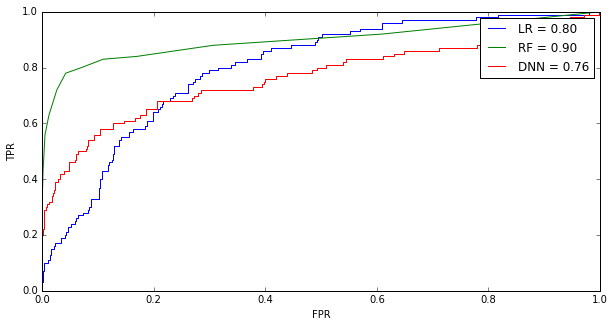

In [187]:
from sklearn.metrics import roc_curve, auc 

# Logistic Regression
prob_lr = pd.DataFrame(list(clf_lr.predict_proba(X_test)))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, prob_lr.iloc[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Random Forest
prob_rf = pd.DataFrame(list(clf_rf.predict_proba(X_test)))
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, prob_rf.iloc[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Deep Neural Network
prob_dnn = pd.DataFrame(list(clf_dnn.predict_proba(input_fn=lambda:input_fn(test_set))))
fpr_dnn, tpr_dnn, thresholds_dnn = roc_curve(y_test, prob_dnn.iloc[:,1])
roc_auc_dnn = auc(fpr_dnn, tpr_dnn)


plt.plot(fpr_lr, tpr_lr, lw=1, label='LR = %0.2f'%roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, lw=1, label='RF = %0.2f'%roc_auc_rf)
plt.plot(fpr_dnn, tpr_dnn, lw=1, label='DNN = %0.2f'%roc_auc_dnn)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

plt.show()


#### Accuracy

In [188]:
# calculate accuracy for logistic regression
score_lr = clf_lr.score(X_test, y_test)

# calculate accuracy for random forest
score_rf = clf_rf.score(X_test, y_test)

# calculate accuracy for neural network
res_dnn = list(clf_dnn.predict(input_fn=lambda:input_fn(test_set)))
score_dnn = np.sum([x == y for x,y in zip(res_dnn, y_test)]) / len(res_dnn)

print("LR:%s\nRF:%s\nDNN:%s\n" % (score_lr, score_rf, score_dnn))

LR:0.854572713643
RF:0.934032983508
DNN:0



#### Confusion matrix

Random Forest performs the best. Let's view the Confusion Matrix:

|      | condition True | condition false|
|------|----------------|---------------|
|prediction true|True Positive|False positive|
|Prediction False|False Negative|True Negative|

Get the model score and confusion matrix:

In [189]:
from sklearn import metrics

y_predict = clf_rf.predict(X_test)

print ("Model Score %.2f \n" % (score_rf))

confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
#print ("Confusion Matrix ", confusion_matrix)

print ("          Predicted")
print ("         |  0  |  1  |")
print ("         |-----|-----|")
print ("       0 | %3d | %3d |" % (confusion_matrix[0, 0],
                                   confusion_matrix[0, 1]))
print ("Actual   |-----|-----|")
print ("       1 | %3d | %3d |" % (confusion_matrix[1, 0],
                                   confusion_matrix[1, 1]))
print ("         |-----|-----|")

Model Score 0.93 

          Predicted
         |  0  |  1  |
         |-----|-----|
       0 | 560 |   7 |
Actual   |-----|-----|
       1 |  37 |  63 |
         |-----|-----|


## 6. Model application

Predict new data

In [190]:
sample = test_set.iloc[30:32]
sample.head()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,international_plan,voice_mail_plan,state,churn
1888,120,408,0,179.9,72,170.0,98,190.6,89,13.8,2,1,1,0,42,1
5,118,510,0,223.4,98,220.6,101,203.9,118,6.3,6,0,1,0,1,0


In [191]:
res_dnn = list(clf_dnn.predict(input_fn=lambda:input_fn(sample)))

print("The prediction is: %s\nThe truth is: %s" % (res_dnn, list(sample['churn'])))

The prediction is: [0, 0]
The truth is: [1, 0]


In [192]:
X_sample = sample.drop('churn', axis=1)
y_sample = sample[['churn']]

res_rf = clf_rf.predict(X_sample)
print("The prediction is: %s\nThe truth is: %s" % (res_rf, list(y_sample['churn'])))

The prediction is: [1 0]
The truth is: [1, 0]
